# **Title: Week 3 Assignment Graph Visualization**


**Graph Analysis using OpenStreetMap and NetworkX**
---



**Submitted by:** Umais Siddiqui, Euclides

**Date:** February 17, 2025

**Course:** Data Science – DATA620

**Video Link**: https://www.youtube.com/watch?v=R1AtwXj6-bc



---








# **Introduction**

OpenStreetMap (OSM) data provides a rich source for analyzing road networks using graph theory. By representing streets as edges and intersections as nodes, we can apply network analysis techniques to understand connectivity, traffic flow, and urban accessibility. This approach helps in identifying key roads, bottlenecks, and important transit points, aiding in better urban planning and transportation management.

# **STEP 1: Loading the Graph**

This code is fetching and analyzing the road network for Queens, New York, USA using OSMnx and NetworkX. Here's a breakdown:


*   osmnx: Used to retrieve and manipulate OpenStreetMap data.
*   networkx: Used for analyzing graph structures.
*   matplotlib.pyplot: Used for plotting the graph.





In [ ]:


## Step 1: Installation and Importing Libraries

# First, ensure you install these libraries. Uncomment the following lines to install in Google Colab.
!pip install osmnx networkx matplotlib

import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

## Step 2: Fetch Graph Data from OpenStreetMap
# We'll fetch the road network for a specific location (e.g., Queens, New York, USA).
location = "Queens, New York, USA"
graph = ox.graph_from_place(location, network_type='drive')  # 'drive' type for road network

# Convert to NetworkX's MultiDiGraph (directed graph)
print("Graph loaded successfully!")
ox.save_graphml(graph, "queens_graph.graphml")


Graph loaded successfully!


# **STEP 2: Basic Graph analysis**



*   number of nodes (intersections/junctions).
*   number of edges (road segments between intersections).
*   **Diameter:** represents the longest shortest path in terms of nodes (road intersections).
*   **Degree Centrality:** Measures how many direct connections a node has.






In [ ]:
# Number of nodes and edges
num_nodes = graph.number_of_nodes()
num_edges = graph.number_of_edges()


# Calculate the diameter (requires the largest connected component)
largest_cc = max(nx.strongly_connected_components(G), key=len)
subgraph = graph.subgraph(largest_cc)

diameter = nx.diameter(nx.DiGraph(subgraph.to_undirected()))  # Convert to undirected for diameter

# Centrality Measures (Degree Centrality as an example)
degree_centrality = nx.degree_centrality(subgraph)

# Get the top 5 nodes with highest degree centrality
top_5_central_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

## Step 4: Display Results
print(f"\nAnalysis Results:")
print(f"- Number of Nodes: {num_nodes}")
print(f"- Number of Edges: {num_edges}")
print(f"- Diameter of the Graph: {diameter}")
print(f"- Top 5 Nodes by Degree Centrality: {top_5_central_nodes}")


Analysis Results:
- Number of Nodes: 21513
- Number of Edges: 56076
- Diameter of the Graph: 179
- Top 5 Nodes by Degree Centrality: [(42787488, 0.00046803332397266686), (42788483, 0.00046803332397266686), (42805539, 0.00046803332397266686), (42815616, 0.00046803332397266686), (42827136, 0.00046803332397266686)]


# **Step 3: Snowball Sampling**





*   The red nodes are the ones selected using snowball sampling.
*   The depth of 3 means we included the seed node, its neighbors, their neighbors, and one more level beyond.
*   This helps in analyzing local connectivity in road networks.



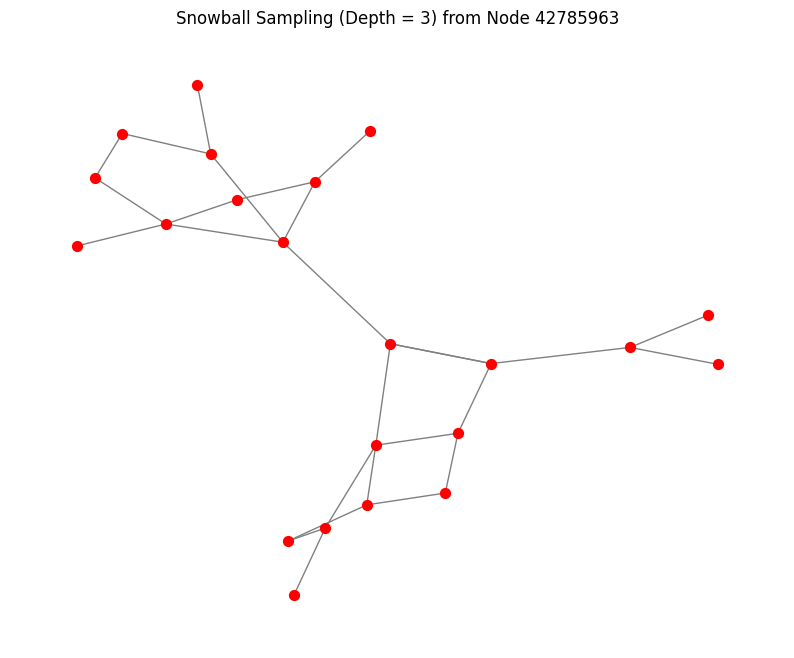

In [38]:


# Convert to an undirected graph for simplicity
G_undirected = graph.to_undirected()

# Select a random seed node
seed_node = list(G_undirected.nodes())[100]  # Change the index if needed

# Perform Snowball Sampling with a depth of 3
snowball_nodes = list(nx.single_source_shortest_path_length(G_undirected, seed_node, cutoff=3).keys())

# Extract the subgraph
G_snowball = G_undirected.subgraph(snowball_nodes)

# Plot the sampled subgraph
fig, ax = plt.subplots(figsize=(10, 8))
nx.draw(G_snowball, ax=ax, node_size=50, node_color="red", edge_color="gray", with_labels=False)

plt.title(f"Snowball Sampling (Depth = 3) from Node {seed_node}")
plt.show()


# **Step 4: Subgraphs**

The code is generating a subgraph that focuses on a local area around a specific node (an intersection) in the road network of Queens. By considering nodes up to 2 steps away, you're looking at a local portion of the network, which might include nearby intersections and the roads connecting them. The plot visually displays this subgraph to help you understand the structure and connectivity in this localized area.

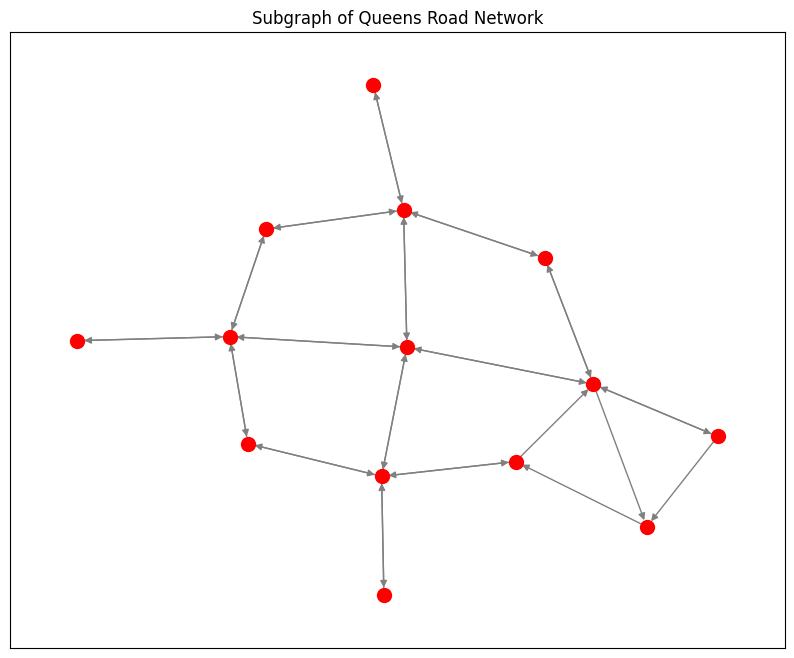

In [ ]:
# Extract a subgraph by selecting a random node and getting neighbors
center_node = list(graph.nodes())[10]  # Select a node (adjust index if needed)
subgraph_nodes = list(nx.single_source_shortest_path_length(G, center_node, cutoff=2).keys())
G_sub = graph.subgraph(subgraph_nodes)

# Plot the subgraph
fig, ax = plt.subplots(figsize=(10, 8))
nx.draw_networkx(G_sub, ax=ax, node_size=100, node_color="red", edge_color="gray", with_labels=False)

plt.title("Subgraph of Queens Road Network")
plt.show()


# **Step 5: Centrality Measures in Subgraph**

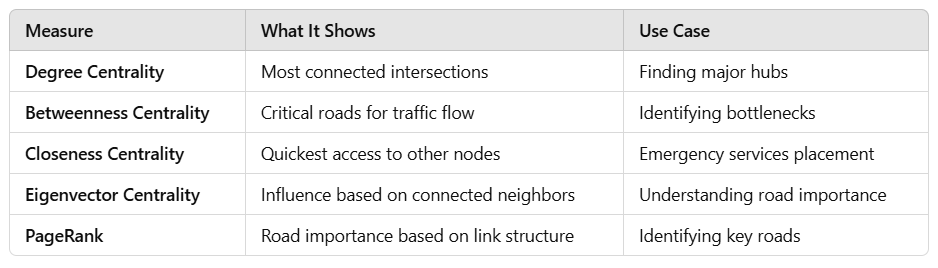

**Plotting Centrality Measures**
The code below provides a comprehensive analysis of the local road network (subgraph), focusing on:

* Structural properties (like number of nodes and edges).
* The diameter to understand the farthest distance in the network.
* Various centrality measures to identify important intersections/nodes within this local road network.
*Finally, it visualizes the results of the centrality measures to show which nodes are the most central in terms of each specific measure.





Number of nodes in subgraph: 14
Number of edges in subgraph: 34
Diameter of the subgraph: 5


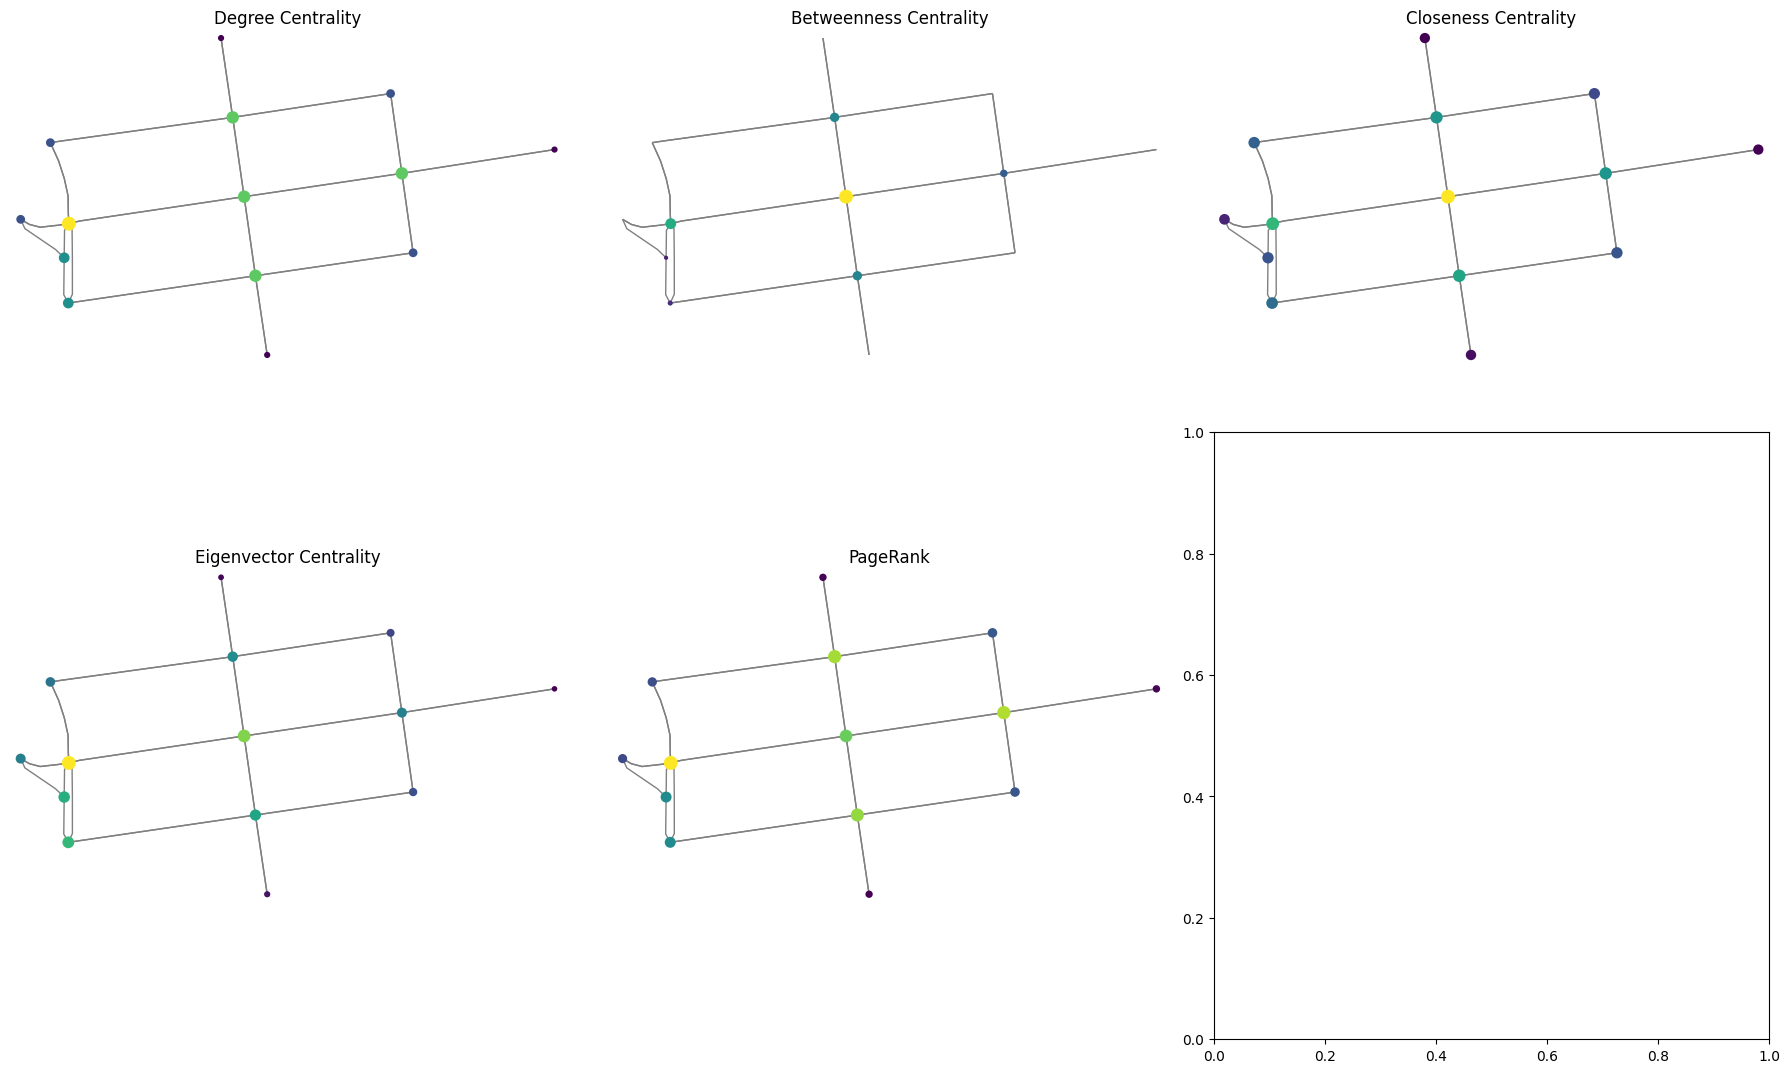

In [ ]:



# Step 1: Number of nodes and edges in the subgraph
num_nodes = len(G_sub.nodes())
num_edges = len(G_sub.edges())
print(f"Number of nodes in subgraph: {num_nodes}")
print(f"Number of edges in subgraph: {num_edges}")

# Step 2: Diameter of the subgraph
# Diameter is the longest shortest path in the graph
try:
    diameter = nx.diameter(G_sub)
    print(f"Diameter of the subgraph: {diameter}")
except nx.NetworkXError as e:
    print(f"Error calculating diameter: {e}")

# Step 3: Centrality measures on the subgraph
# Convert to undirected for centrality calculations
G_sub_undirected = nx.Graph(G_sub)

# Degree Centrality
degree_centrality = nx.degree_centrality(G_sub_undirected)
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G_sub_undirected, weight='length')
# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G_sub_undirected)
# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G_sub_undirected, max_iter=1000)
# PageRank
pagerank = nx.pagerank(G_sub_undirected)

# Normalize the centrality values for visualization
def normalize_centrality(centrality_dict):
    max_value = max(centrality_dict.values())
    return {node: value / max_value for node, value in centrality_dict.items()}

degree_centrality = normalize_centrality(degree_centrality)
betweenness_centrality = normalize_centrality(betweenness_centrality)
closeness_centrality = normalize_centrality(closeness_centrality)
eigenvector_centrality = normalize_centrality(eigenvector_centrality)
pagerank = normalize_centrality(pagerank)

# Step 4: Plot centrality measures
centrality_measures = {
    "Degree Centrality": degree_centrality,
    "Betweenness Centrality": betweenness_centrality,
    "Closeness Centrality": closeness_centrality,
    "Eigenvector Centrality": eigenvector_centrality,
    "PageRank": pagerank
}

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()
for i, (title, centrality) in enumerate(centrality_measures.items()):
    ax = axes[i]
    nc = [centrality[node] if node in centrality else 0 for node in G_sub_undirected.nodes()]
    ox.plot_graph(G_sub, ax=ax, node_color=nc, node_size=[v * 100 for v in nc], edge_color="gray", show=False, close=False)
    ax.set_title(title)

plt.tight_layout()
plt.show()

# **Conclusion:**

The OpenStreetMap road network analysis reveals key insights into urban connectivity, highlighting critical intersections and roads using centrality measures such as degree, betweenness, closeness, eigenvector, and PageRank. These metrics help identify major transit hubs, optimize traffic flow, and improve urban planning. Subgraph analysis provides localized insights into congestion and accessibility. While large-scale computations can be time-consuming, the results are valuable for transportation planning, emergency response, and infrastructure development. Overall, this analysis aids in making data-driven decisions for smarter and more efficient city planning.